In [134]:
import numpy as np
from matplotlib.pyplot import subplots, cm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay, accuracy_score
import sklearn.model_selection as skm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

from ISLP import load_data, confusion_table
from ISLP.svm import plot as plot_svm

## 9.7 Support Vector Machines Applied Exercises

4. Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifer on the training data. Which technique performs best on the test data? Make
plots and report training and test error rates in order to back up your assertions.

In [47]:
# Generate a two-class data set with non-linear separation between classes
rng = np.random.default_rng(1)
X = rng.standard_normal((200, 2))
X[:100] += 4
X[100:150] -= 4
y = np.array([1]*150+[2]*50)

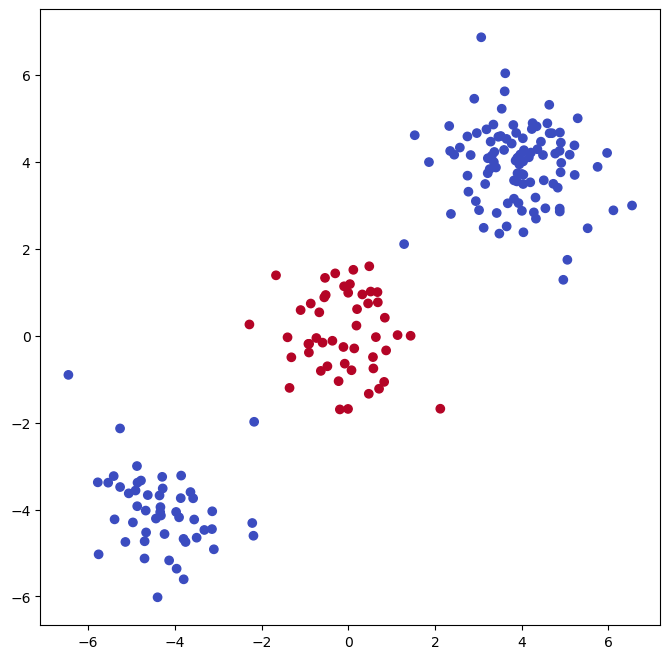

In [48]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.coolwarm);

We try support vector classifier, polynomial kernel and radial kernel:

In [34]:
(X_train, X_test, y_train, y_test) = skm.train_test_split(X, y, test_size=0.5, random_state=0)
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [35]:
svm_linear.score(X_train, y_train)

0.75

In [36]:
svm_poly = SVC(kernel='poly', degree=2)
svm_poly.fit(X_train, y_train)
svm_poly.score(X_train, y_train)

0.99

In [37]:
svm_rad = SVC(kernel='rbf', gamma=1, C=1)
svm_rad.fit(X_train, y_train)
svm_rad.score(X_train, y_train)

1.0

We see that the polynomial and radial kernels almost perfectly divide the classes, outperforming the support vector classifier.

For the test data:

In [42]:
for model in [svm_linear, svm_poly, svm_rad]:
    acc_score = model.score(X_test, y_test)
    print(f'Model: {str(model)}, \nAccuracy: {acc_score}')

Model: SVC(C=10, kernel='linear'), 
Accuracy: 0.75
Model: SVC(degree=2, kernel='poly'), 
Accuracy: 0.99
Model: SVC(C=1, gamma=1), 
Accuracy: 0.99


We see that polynomial and radial kernels also outperform on the test data.

5. We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

Generate a data set with `n = 500` and `p = 2`, such that the observations belong to two classes with a quadratic decision boundary between them.

In [50]:
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
y = x1**2 - x2**2 > 0

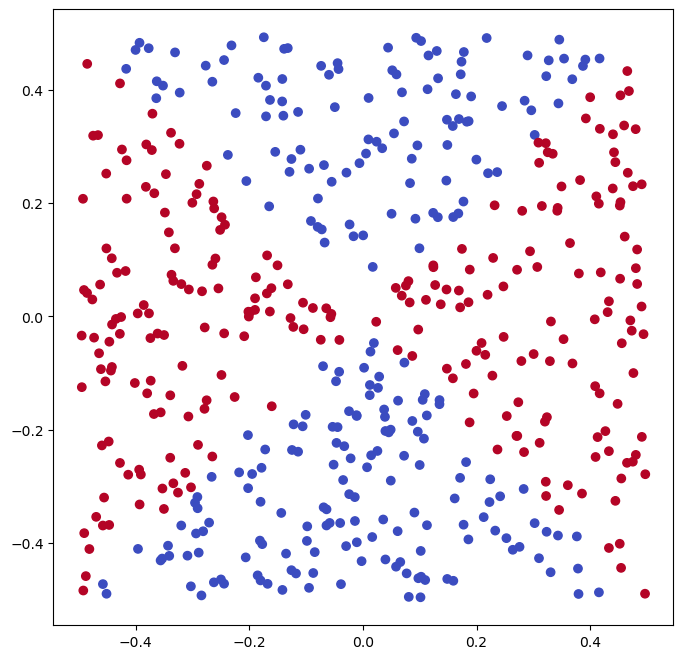

In [51]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x1, x2, c=y, cmap=cm.coolwarm);

Fit a logistic regression model to the data, using X1 and X2 as predictors.

In [59]:
log_reg = LogisticRegression()
X = np.column_stack((x1, x2))
log_reg.fit(X, y)

LogisticRegression()

Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

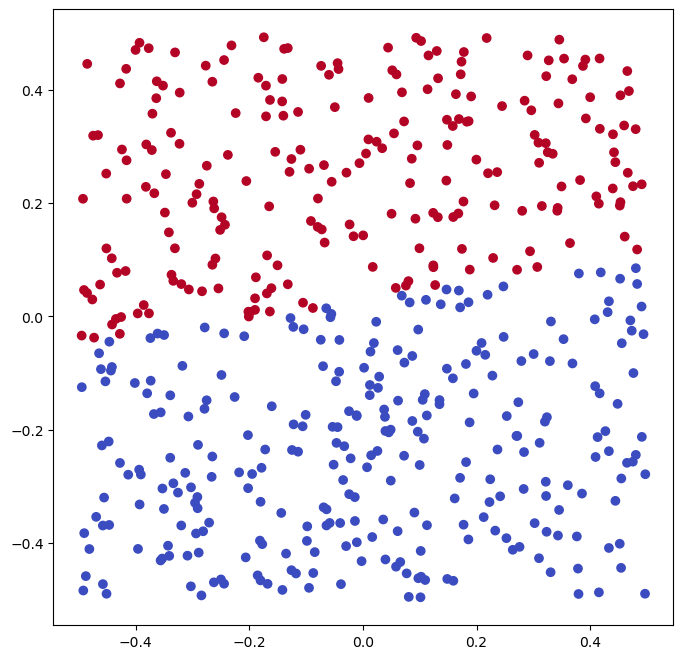

In [61]:
log_reg_pred = log_reg.predict(X)

fig, ax = subplots(figsize=(8, 8))
ax.scatter(x1, x2, c=log_reg_pred, cmap=cm.coolwarm);

Now fit a logistic regression model to the data using non-linear functions of X<sub>1</sub> and X<sub>2</sub> as predictors.

In [62]:
log_reg_non_lin = LogisticRegression()
X = np.column_stack((x1**2, x2**2))
log_reg_non_lin.fit(X, y)

LogisticRegression()

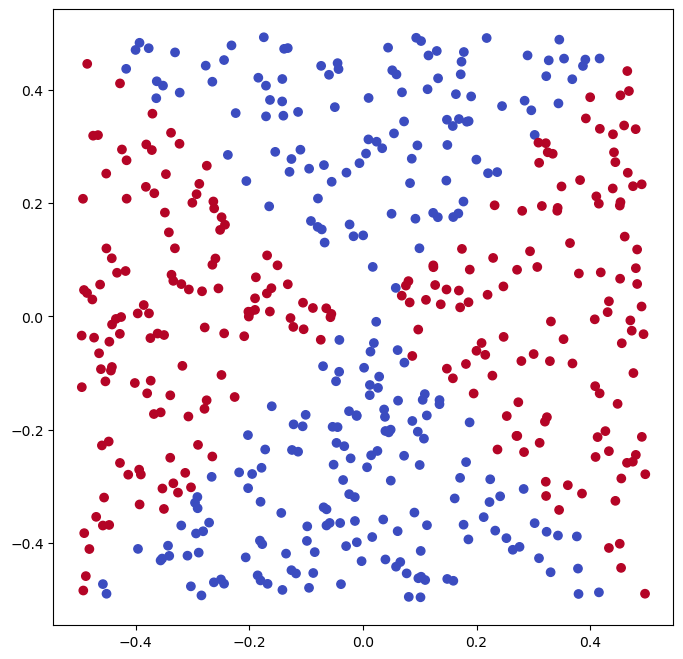

In [65]:
log_reg_non_lin_pred = log_reg_non_lin.predict(X)

fig, ax = subplots(figsize=(8, 8))
ax.scatter(x1, x2, c=log_reg_non_lin_pred, cmap=cm.coolwarm);

Fit a support vector classifer to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

In [67]:
svm_linear = SVC(C=10, kernel='linear')
X = np.column_stack((x1, x2))
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

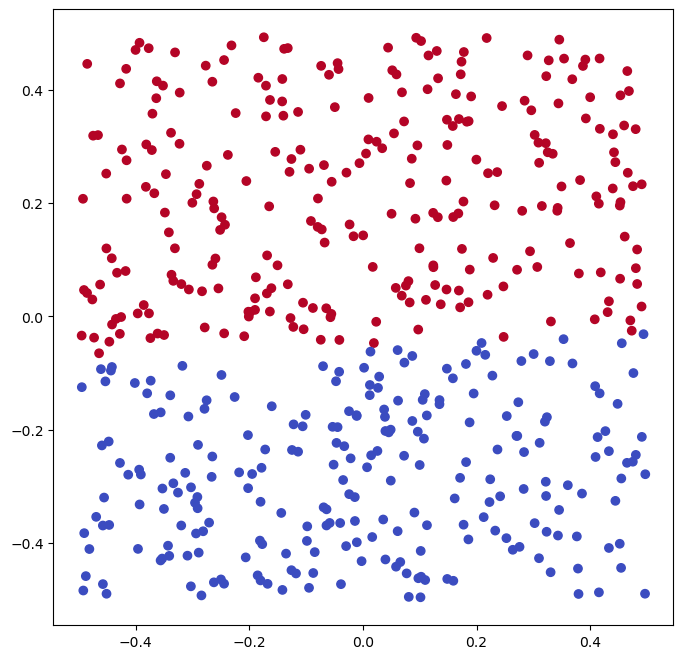

In [68]:
svm_linear_pred = svm_linear.predict(X)

fig, ax = subplots(figsize=(8, 8))
ax.scatter(x1, x2, c=svm_linear_pred, cmap=cm.coolwarm);

Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

In [69]:
svm_rad = SVC(kernel='rbf', gamma=1, C=1)
svm_rad.fit(X, y)

SVC(C=1, gamma=1)

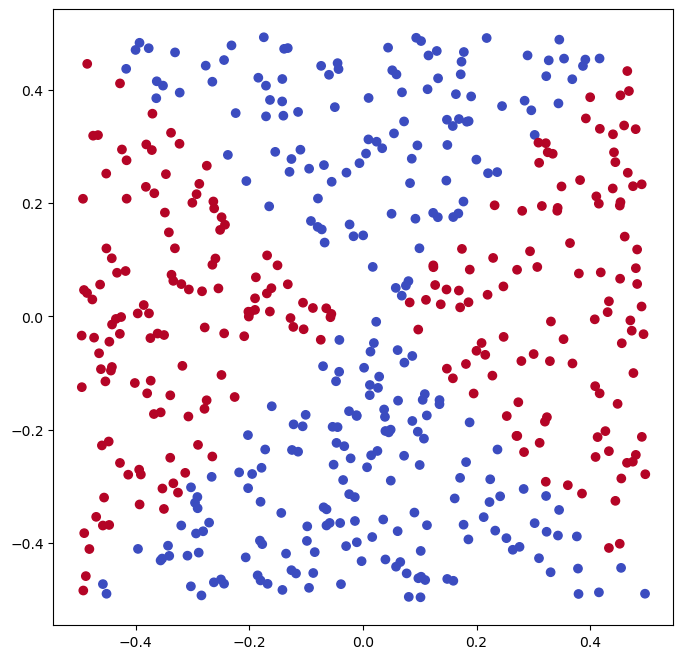

In [70]:
svm_rad_pred = svm_rad.predict(X)

fig, ax = subplots(figsize=(8, 8))
ax.scatter(x1, x2, c=svm_rad_pred, cmap=cm.coolwarm);

We see that logistic regression and linear kernel could not separate the classes, while the quadratic and radial kernels did a good job.

6. At the end of Section 9.6.1, it is claimed that in the case of data that is
just barely linearly separable, a support vector classifer with a small value of C that misclassifes a couple of training observations may perform better on test data than one with a huge value of C that does not misclassify any training observations. You will now investigate this claim.

Generate two-class data with `p = 2` in such a way that the classes
are just barely linearly separable.

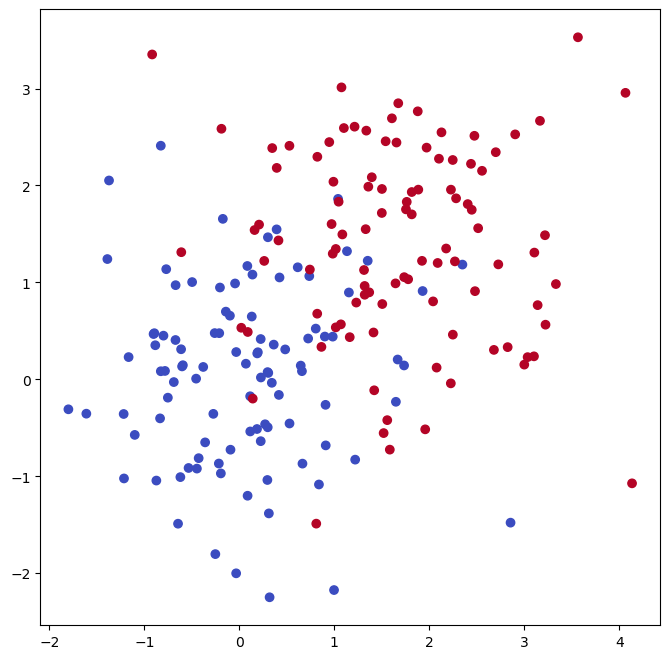

In [109]:
X = rng.standard_normal((200, 2))
y = np.array([-1]*100+[1]*100)
X[y==1] += 1.5
fig, ax = subplots(figsize=(8,8))
ax.scatter(
    X[:,0],
    X[:,1],
    c=y,
    cmap=cm.coolwarm
);

Compute the cross-validation error rates for support vector classifers with a range of `C` values. How many training observations are misclassifed for each value of `C` considered, and how does this relate to the cross-validation errors obtained?

In [110]:
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.5, random_state=0)

In [113]:
svm_linear = SVC(C=0.1, kernel='linear')

kfold = skm.KFold(
    5,
    random_state=0,
    shuffle=True
)

c_values = [0.001, 0.01, 0.1, 0.1, 1, 5, 10, 100]

grid = skm.GridSearchCV(
    svm_linear,
    {'C': c_values},
    refit=True,
    cv=kfold,
    scoring='accuracy'
)

grid.fit(X_train, y_train)
grid.best_params_

{'C': 1}

In [114]:
grid.cv_results_['mean_test_score']

array([0.49, 0.8 , 0.84, 0.84, 0.86, 0.85, 0.85, 0.85])

Generate an appropriate test data set, and compute the test errors corresponding to each of the values of `C` considered. Which value of `C` leads to the fewest test errors, and how does this compare to the values of `C` that yield the fewest training errors and the fewest cross-validation errors?

In [118]:
test_errors = []

for c in c_values:
    grid.best_estimator_.set_params(C=c)
    grid.best_estimator_.fit(X_train, y_train)
    y_pred = grid.best_estimator_.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_pred)
    
    test_errors.append(test_error)

test_errors

[0.53,
 0.14,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002]

As expected, higher values of C generalise better to the test data because of the wide resulting margin. The classifier has low variance (since many observations are support vectors) but high bias.

7.  In this problem, you will use support vector approaches in order to
predict whether a given car gets high or low gas mileage based on the
`Auto` data set.

Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [127]:
Auto = load_data('Auto')
Auto['mpg_binary'] = (Auto['mpg'] > Auto['mpg'].quantile(0.5)).astype(int)

In [135]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_binary
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1


Fit a support vector classifer to the data with various values of `C`, in order to predict whether a car gets high or low gas mileage.
Report the cross-validation errors associated with different values of this parameter. Comment on your results. Note you will need to fit the classifer without the gas mileage variable to produce sensible results.

In [145]:
X_train = Auto.drop(columns=['mpg', 'mpg_binary', 'name'])
y_train = Auto['mpg_binary']

# Separate numeric and categorical columns
numeric_features = Auto.columns.drop(['name', 'mpg', 'mpg_binary'])

# Define transformers for preprocessing
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardise numeric features
])

# Use ColumnTransformer to apply the appropriate transformation to each column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

# Combine preprocessing with SVM model
svm_linear = SVC(C=0.1, kernel='linear')

# Create a pipeline that includes preprocessing and the SVM model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('svm', svm_linear)])

kfold = skm.KFold(
    5,
    random_state=0,
    shuffle=True
)

c_values = [0.001, 0.01, 0.1, 0.1, 1, 5, 10, 100]

# Create a grid search object
grid = skm.GridSearchCV(
    model,
    param_grid={'svm__C': c_values},  # 'svm__C' indicates the C parameter of the SVM inside the pipeline
    refit=True,
    cv=kfold,
    scoring='accuracy'
)

# Fit the grid search to your training data
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object'))])),
                                       ('svm', SVC(C=0.1, kernel='linear'))]),
             param_grid={'svm__C': [0.001, 0.01, 0.1, 0.1, 1, 5, 10, 100]},
             scoring='accuracy')

In [146]:
grid.best_params_

{'svm__C': 1}

In [147]:
grid.cv_results_['mean_test_score']

array([0.85186628, 0.90817916, 0.91330737, 0.91330737, 0.91333982,
       0.90824408, 0.90824408, 0.90824408])

The linear SVM achieves the highest accuracy score for C=1, although accuracy does not vary much with C.

Now repeat, this time using SVMs with radial and polynomial basis kernels, with different values of `gamma` and `degree` and `C`. Comment on your results.

In [149]:
svm_poly = SVC(kernel='poly')

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('svm', svm_poly)])

degree_values = [1, 2, 3]

grid = skm.GridSearchCV(
    model,
    param_grid={'svm__C': c_values,
                'svm__degree': degree_values}, 
    refit=True,
    cv=kfold,
    scoring='accuracy'
)

# Fit the grid search to your training data
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object'))])),
                                       ('svm', SVC(kernel='poly'))]),
             param_grid={'svm__C': [0.001, 0.01, 0.1, 0.1, 1, 5, 10, 100],
                         'svm__degree': [1, 2, 3]},
             scoring='accuracy')

In [150]:
grid.best_params_

{'svm__C': 100, 'svm__degree': 3}

In [152]:
grid.best_score_

0.9234988640051931

In [154]:
svm_radial = SVC(kernel='rbf')

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('svm', svm_radial)])

gamma_values = [0.5, 1, 2, 3, 4]

grid = skm.GridSearchCV(
    model,
    param_grid={'svm__C': c_values,
                'svm__gamma': gamma_values}, 
    refit=True,
    cv=kfold,
    scoring='accuracy'
)

# Fit the grid search to your training data
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object'))])),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.001, 0.01, 0.1, 0.1, 1, 5, 10, 100],
                         'svm__gamma': [0.5, 1, 2, 3, 4]},
             scoring='accuracy')

In [155]:
grid.best_params_

{'svm__C': 1, 'svm__gamma': 1}

In [156]:
grid.best_score_

0.931223628691983

After searching the hyperparameter space, the radial kernel was able to achieve the best overall fit on the training data. 